In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: ignored

In [ ]:
from matplotlib.pyplot import subplots
import statsmodels.api as sm
# from ISLP import load_data
# from ISLP.models import (ModelSpec as MS, summarize)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA ,QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Q 2-8

(a)

In [ ]:
college = pd.read_csv('/content/drive/MyDrive/ISLP/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(b)

In [ ]:
college2 = pd.read_csv('/content/drive/MyDrive/ISLP/College.csv', index_col = 0)
college3 = college.rename({'Unnamed: 0 ': 'College'}, axis =1)
#college3 = college3.set_index('College')

(c)

In [ ]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(d)

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

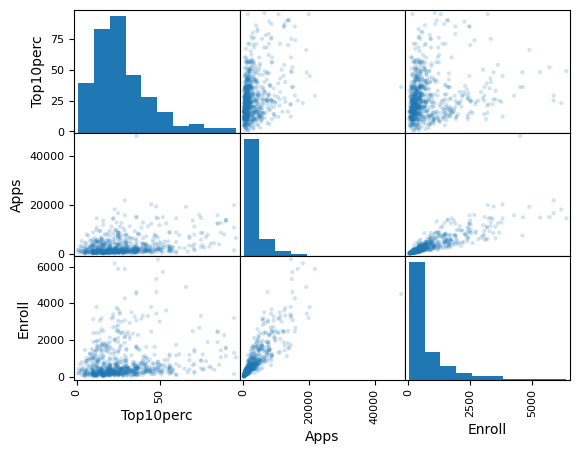

In [ ]:
a1 = np.array(college.iloc[:,[5,2,4]])
df = pd.DataFrame(a1, columns= ['Top10perc','Apps','Enroll'])
pd.plotting.scatter_matrix(df, alpha=0.2)

(e)

([<matplotlib.axis.XTick at 0x7baca792aad0>,
 [Text(1, 0, 'Private'), Text(2, 0, 'Non-private')])

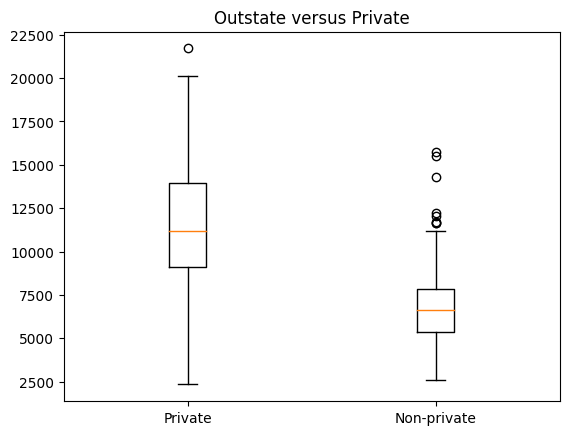

In [ ]:
outstate_col = np.array(college.iloc[:,9])
priv_col = np.array(college.iloc[:,1])
private = []
non_private = []
for i in range(len(priv_col)):
  if priv_col[i] == 'Yes':
    private.append(outstate_col[i])
  else:
    non_private.append(outstate_col[i])
fig1, ax1 = plt.subplots()
ax1.boxplot([private, non_private])
plt.title('Outstate versus Private')
plt.xticks([1, 2], ['Private', 'Non-private'])

(f)

No     699
Yes     78
Name: Elite, dtype: int64


([<matplotlib.axis.XTick at 0x7baca5ff0e20>,
 [Text(1, 0, 'Elite'), Text(2, 0, 'Non-elite')])

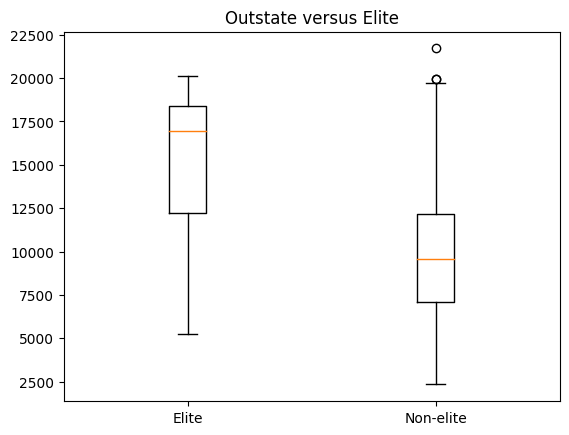

In [ ]:
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100], labels=['No','Yes'])
college['Elite']
print(college['Elite'].value_counts())
elite = []
non_elite = []
for i in range(len(outstate_col)):
  if college['Elite'][i] == 'Yes':
    elite.append(outstate_col[i])
  else:
    non_elite.append(outstate_col[i])
fig1, ax1 = plt.subplots()
ax1.boxplot([elite, non_elite])
plt.title('Outstate versus Elite')
plt.xticks([1, 2], ['Elite', 'Non-elite'])

(g)

Text(0.5, 1.0, 'Grad.Rate')

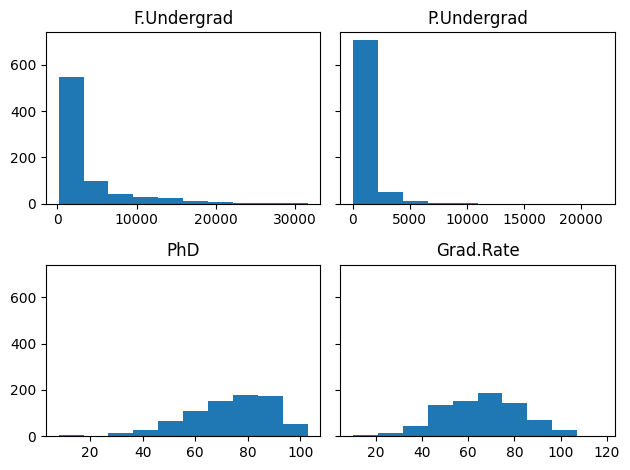

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0,0].hist(college.iloc[:,7])
axs[0,1].hist(college.iloc[:,8])
axs[1,0].hist(college.iloc[:,13])
axs[1,1].hist(college.iloc[:,18])
axs[0, 0].set_title("F.Undergrad")
axs[0, 1].set_title("P.Undergrad")
axs[1, 0].set_title("PhD")
axs[1, 1].set_title("Grad.Rate")

(h)

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top10perc'>,
        <Axes: xlabel='PhD', ylabel='Top10perc'>,
        <Axes: xlabel='Grad.Rate', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Top25perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top25perc'>,
        <Axes: xlabel='PhD', ylabel='Top25perc'>,
        <Axes: xlabel='Grad.Rate', ylabel='Top25perc'>],
       [<Axes: xlabel='Top10perc', ylabel='PhD'>,
        <Axes: xlabel='Top25perc', ylabel='PhD'>,
        <Axes: xlabel='PhD', ylabel='PhD'>,
        <Axes: xlabel='Grad.Rate', ylabel='PhD'>],
       [<Axes: xlabel='Top10perc', ylabel='Grad.Rate'>,
        <Axes: xlabel='Top25perc', ylabel='Grad.Rate'>,
        <Axes: xlabel='PhD', ylabel='Grad.Rate'>,
        <Axes: xlabel='Grad.Rate', ylabel='Grad.Rate'>]], dtype=object)

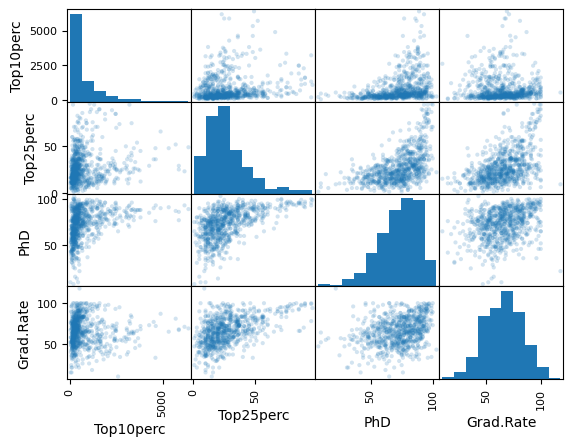

In [ ]:
a2 = np.array(college.iloc[:,[4,5,13,18]])
df2 = pd.DataFrame(a2, columns= ['Top10perc','Top25perc','PhD','Grad.Rate'])
pd.plotting.scatter_matrix(df2, alpha=0.2)

Q2-9, Auto data

(a)

In [ ]:
Auto = pd.read_csv('/content/drive/MyDrive/ISLP/Auto.csv', na_values=['?'])
Auto_new = Auto.dropna()
Auto = Auto_new
Auto.shape

(392, 9)

(b) Quantitative predictors:
mpg
displacement
horsepower
weight
acceleration

In [ ]:
Quantity = Auto.iloc[:,[0,2,3,4,5]]
print(Quantity.min())
print(Quantity.max())

mpg                9.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
dtype: float64
mpg               46.6
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
dtype: float64


(c)

In [ ]:
print(Quantity.mean())
print(Quantity.std())

mpg               23.445918
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
dtype: float64
mpg               7.805007
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
dtype: float64


(d)

In [ ]:
r = list(range(0,10,1))+(list(range(11,392,1)))
Quantity_1 = Quantity.iloc[r,:]

In [ ]:
print(Quantity_1.min())
print(Quantity_1.max())
print(Quantity_1.mean())
print(Quantity_1.std())

mpg                9.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
dtype: float64
mpg               46.6
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
dtype: float64
mpg               23.467519
displacement     193.929668
horsepower       104.301790
weight          2976.086957
acceleration      15.555499
dtype: float64
mpg               7.803266
displacement    104.340878
horsepower       38.396995
weight          849.972749
acceleration      2.748074
dtype: float64


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='acceleration', ylabel='horsepower'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='horsepower', ylabel='weight'>,
        <Axes: x

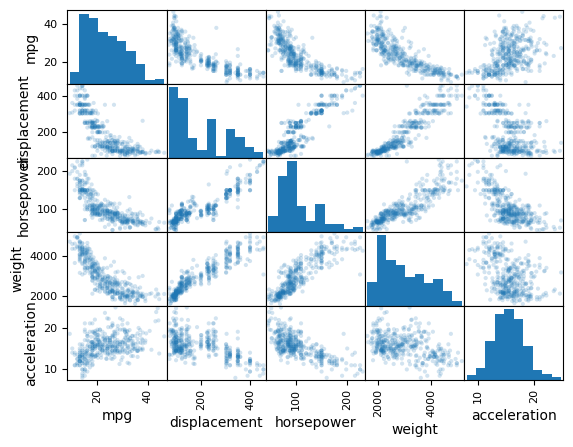

In [ ]:
pd.plotting.scatter_matrix(Quantity, alpha=0.2)

Q 3-13

a)

In [ ]:
x = np.random.normal(0,1,100)
print(x)

[ 0.80466703 -1.66726255  0.47731315  0.47548365  0.04089297  1.23649897
 -2.94710765 -0.43994691 -0.48790254 -0.54669579 -0.56163698  0.20607459
 -0.54353647 -0.84585407 -0.64458432  0.18552498  1.06335115 -0.6767987
  1.20728999  2.26244189 -0.17577663  1.49336954  0.71244912  0.2506624
  1.00260086  0.83068037 -0.17719024 -0.69089653  0.25015964 -0.90329819
 -0.35888425 -0.13677611  0.824769    0.2125396  -2.30081249 -1.43112202
 -0.36401886  0.96071999 -0.05471918  0.22275335 -0.1173679   0.4078906
 -1.04483159 -1.02068591 -0.83150374 -0.19193327 -0.70297444 -1.15051506
 -0.66331246  0.56704604  0.17633843 -0.92770973 -0.124593    0.41619843
 -0.91560511 -0.20425029  1.05003239  1.88993516 -0.16701841  0.08007794
  1.19442236 -1.31660164  0.77652106 -0.46218521 -0.22647825 -0.19856586
  0.09111338  1.51184437 -0.56706532  0.20797447  0.13546585  1.05279618
 -1.15186546  2.23286416  1.1092706  -0.1794784   1.92244774 -0.21985682
 -0.00608468 -1.11654728 -1.94617732 -0.2346843   0.40

b)

In [ ]:
eps = np.random.normal(0,0.25,100)
print(eps)

[-0.15608526 -0.25503232  0.05784405  0.05803581  0.20723724  0.00479549
  0.05176664  0.31504499 -0.23623031 -0.10705495 -0.16336993 -0.21468547
 -0.12347018  0.03233946  0.37997541 -0.06388413 -0.19294967  0.03127662
 -0.07900988  0.33886494 -0.47988672 -0.1282726   0.19193967  0.01333209
  0.03151062 -0.33730938 -0.15786104  0.31112889 -0.29444677 -0.49225751
  0.04162401 -0.11540772  0.08102169 -0.00832768  0.43310628 -0.06868612
 -0.06954921 -0.29837758 -0.21575377  0.10765134  0.28176614  0.04770206
  0.22301451  0.03698882  0.22354137 -0.13571324  0.11015041 -0.1552898
 -0.22482631 -0.13809305  0.08870966 -0.21621401  0.31961668 -0.16760385
 -0.06052635 -0.39489568  0.22373724 -0.41815792  0.18188835  0.00609483
 -0.01534592  0.07608521  0.21267206 -0.10225115 -0.19148497 -0.38779722
  0.04353332 -0.32845503 -0.0046497   0.49793859 -0.0996975  -0.50917197
 -0.01643813 -0.13648525  0.3318005   0.02832596  0.04632138  0.06696909
 -0.10662275 -0.08654832 -0.30187642 -0.01748192  0.

c)

In [ ]:
y = -1 + 0.5*x + eps
print(y)
b0 = -1
b1 = 0.5

[-0.75375174 -2.08866359 -0.70349937 -0.70422237 -0.77231628 -0.37695502
 -2.42178718 -0.90492846 -1.48018158 -1.38040284 -1.44418842 -1.11164818
 -1.39523841 -1.39058757 -0.94231675 -0.97112164 -0.6612741  -1.30712273
 -0.47536489  0.47008588 -1.56777504 -0.38158783 -0.45183577 -0.86133671
 -0.46718895 -0.9219692  -1.24645616 -1.03431937 -1.16936695 -1.94390661
 -1.13781811 -1.18379578 -0.50659381 -0.90205787 -1.71729997 -1.78424713
 -1.25155864 -0.81801759 -1.24311335 -0.78097199 -0.77691781 -0.74835264
 -1.29940128 -1.47335414 -1.1922105  -1.23167987 -1.24133681 -1.73054733
 -1.55648254 -0.85457003 -0.82312113 -1.68006887 -0.74267982 -0.95950464
 -1.51832891 -1.49702083 -0.25124656 -0.47319034 -0.90162085 -0.9538662
 -0.41813475 -1.58221561 -0.39906741 -1.33334375 -1.30472409 -1.48708015
 -0.91090999 -0.57253284 -1.28818236 -0.39807417 -1.03196458 -0.98277388
 -1.59237087 -0.02005317 -0.1135642  -1.06141324  0.00754525 -1.04295932
 -1.10966508 -1.64482196 -2.27496508 -1.13482407 -0.

d)

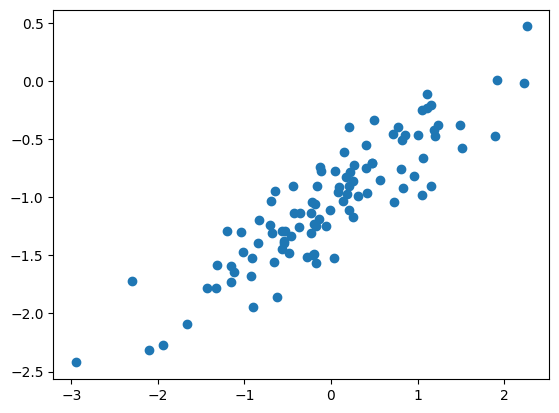

In [ ]:
plt.scatter(x,y)

e)

In [ ]:
beta_1_hat = np.cov(x,y)[0][1]/np.var(x)
beta_0_hat = np.mean(y) - beta_1_hat*np.mean(x)
print(beta_0_hat)
print(beta_1_hat)

-1.0358793753172373
0.5017034832493338


f)

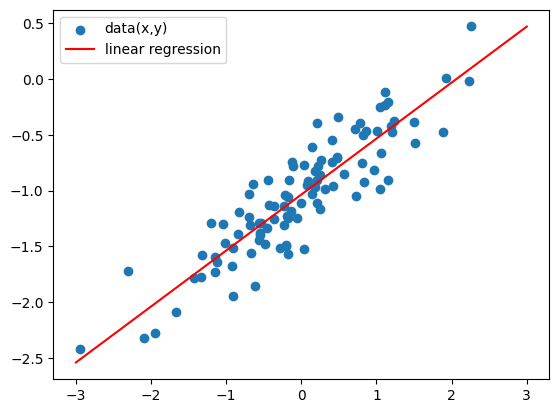

In [ ]:
plt.scatter(x,y,label='data(x,y)')
x1 = np.linspace(-3, 3, 1000)
y1 = beta_0_hat + beta_1_hat * x1
plt.plot(x1,y1,color = 'red', label='linear regression')
plt.legend()
plt.show()

g)

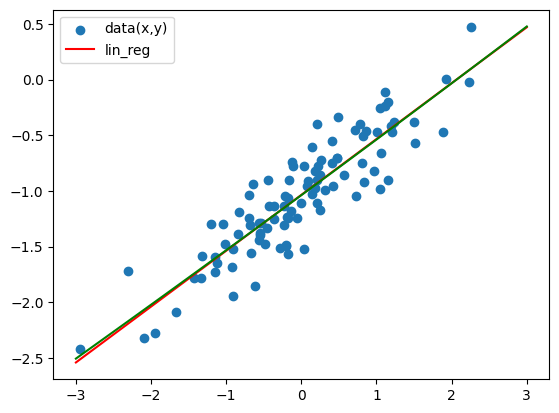

In [ ]:
plt.scatter(x,y,label='data(x,y)')
x1 = np.linspace(-3, 3, 100)
y1 = beta_0_hat + beta_1_hat * x1
plt.plot(x1,y1,color = 'red',label='lin_reg')
plt.legend()

#polynomial fit with degree = 2
model = np.polyfit(x,y,1)
#add fitted polynomial line to scatterplot
plt.plot(x1, model, color='green', label='quad_reg')
plt.show()